## 2. Data Analysis

## 1) 기술통계

In [1]:
import pandas as pd
import numpy as np

# Load Data
Seoul_0719 = pd.read_csv('..\data\output\서울시 개별사고정보(2007_2019).csv',  encoding="cp949")
Seoul_0719.head()

,발생일,발생시간,요일,주야,발생지_시군구,법정동명,사고내용,사망자수,중상자수,경상자수,...,피해자신체상해정도,주야코드,사고내용코드,가해자차종코드,기상상태코드,노면상태코드,사망여부,피해자연령대,발생연도,발생월
0,20070101,00시,월,야,금천구,시흥동,중상,0,1,0,...,중상,0,1,0,0,0,0,20대,2007,1
1,20070101,01시,월,야,동대문구,청량리동,중상,0,1,0,...,중상,0,1,0,0,0,0,40대,2007,1
2,20070101,01시,월,야,마포구,서교동,중상,0,1,0,...,상해없음,0,1,5,0,0,0,20대,2007,1
3,20070101,01시,월,야,강서구,화곡동,중상,0,1,0,...,중상,0,1,0,0,0,0,10대,2007,1
4,20070101,01시,월,야,송파구,가락동,경상,0,0,1,...,경상,0,2,3,0,0,0,40대,2007,1


In [2]:
Seoul_0719.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492937 entries, 0 to 492936
Data columns (total 37 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   발생일        492937 non-null  int64 
 1   발생시간       492937 non-null  object
 2   요일         492937 non-null  object
 3   주야         492937 non-null  object
 4   발생지_시군구    492937 non-null  object
 5   법정동명       492849 non-null  object
 6   사고내용       492937 non-null  object
 7   사망자수       492937 non-null  int64 
 8   중상자수       492937 non-null  int64 
 9   경상자수       492937 non-null  int64 
 10  부상신고자수     492937 non-null  int64 
 11  사고유형_대분류   492937 non-null  object
 12  사고유형_중분류   492937 non-null  object
 13  사고유형       492937 non-null  object
 14  가해자법규위반    492936 non-null  object
 15  노면상태_대분류   492937 non-null  object
 16  노면상태       492937 non-null  object
 17  기상상태       492937 non-null  object
 18  도로형태_대분류   492937 non-null  object
 19  도로형태       492937 non-null  object
 20  가해자차

In [3]:
Seoul_0719['발생일'] = Seoul_0719['발생일'].astype(str)

for i in Seoul_0719.columns : 
    print(Seoul_0719[i].value_counts())

발생일
20090912    187
20100910    186
20081223    180
20151107    179
20191115    176
           ... 
20100105     38
20180217     37
20190205     36
20140131     30
20100104     26
Name: count, Length: 4748, dtype: int64
발생시간
18시    27911
19시    27095
20시    25252
22시    25237
17시    25139
16시    24907
23시    24894
21시    24631
15시    24271
08시    23338
14시    22805
00시    21500
13시    21400
09시    20684
12시    20313
11시    20072
10시    19814
01시    17990
07시    15565
02시    14234
06시    12494
05시    11670
03시    10979
04시    10742
Name: count, dtype: int64
요일
금    77980
토    76196
목    72056
수    71932
화    70698
월    67473
일    56602
Name: count, dtype: int64
주야
주    250802
야    242135
Name: count, dtype: int64
발생지_시군구
강남구     43985
송파구     32613
영등포구    28081
서초구     26487
동대문구    22496
강서구     21651
중랑구     21608
마포구     20408
관악구     19997
노원구     19743
성북구     19490
구로구     18658
양천구     17699
강동구     17588
중구      16804
종로구     16591
광진구     16465
은평구     16088
용산구     15856
동작구 

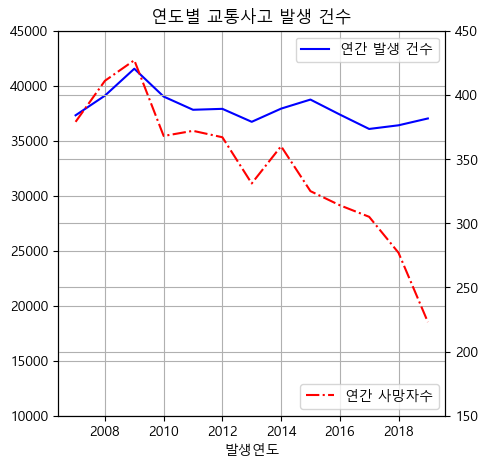

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rc('figure', figsize=(5, 5))

Seoul_0719.groupby('발생연도').size().plot.line(title='연도별 교통사고 발생 건수', color='blue', grid=True)
plt.ylim(10000, 45000)
plt.legend(['연간 발생 건수'])
Seoul_0719.groupby('발생연도')['사망자수'].sum().plot.line(linestyle='-.',
                                              secondary_y=True, color='red', grid=True)
plt.ylim(150, 450)
plt.legend(['연간 사망자수'], loc='lower right')
plt.show()
# Seoul_0719.groupby('발생연도')['사망자수'].sum() # 연도별 사망자수 계산

In [5]:
# 연도 - 월별 사고발생 건수
plt.figure(figsize=(80, 100))

for i in range(13):
    year = 2007 + i
    plt.subplot(7, 2, i + 1)
    Seoul_0719[Seoul_0719['발생연도'] == year].groupby(Seoul_0719['발생월']).size().plot(kind='bar')
    plt.title('%d년도 월별 사고발생 건수' % year, fontsize=50)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
plt.show()

<Axes: title={'center': '월별 사고발생 건수'}, xlabel='발생월'>

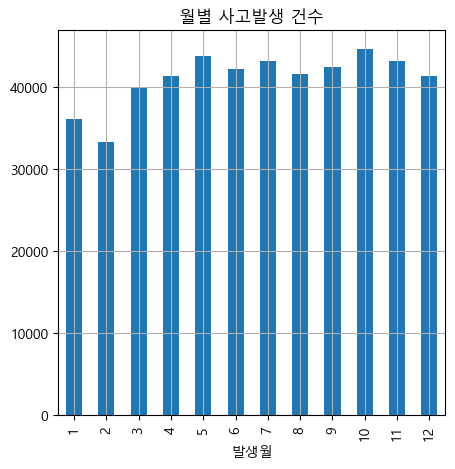

In [6]:
# 월별 교통사고 발생 건수
Seoul_0719.groupby('발생월').size().plot(kind='bar', grid=True, title='월별 사고발생 건수')

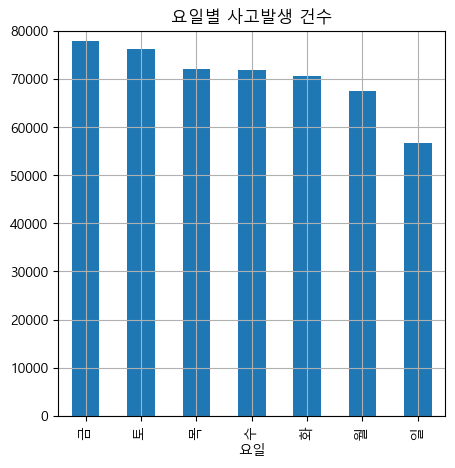

In [7]:
# 요일별 교통사고 발생 건수
Seoul_0719.groupby('요일').size().sort_values(ascending=False).plot(kind='bar', grid=True, title='요일별 사고발생 건수')
plt.ylim(0, 80000)
plt.show()

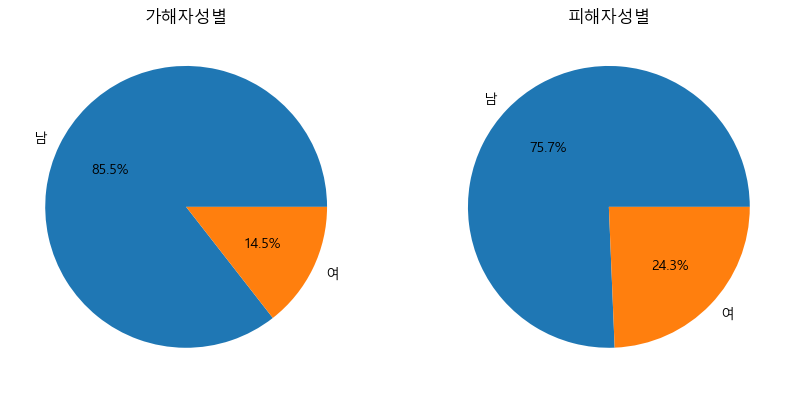

In [8]:
# 가해자, 피해자 성비
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
Seoul_0719.groupby(Seoul_0719['가해자성별']).size().sort_values(ascending=False).plot(kind='pie', title='가해자성별', autopct='%.1f%%')
plt.subplot(1, 2, 2)
Seoul_0719.groupby(Seoul_0719['피해자성별']).size().sort_values(ascending=False).plot(kind='pie', title='피해자성별', autopct='%.1f%%')
plt.show()

<Axes: title={'center': '차대사람 사고 피해자성별'}>

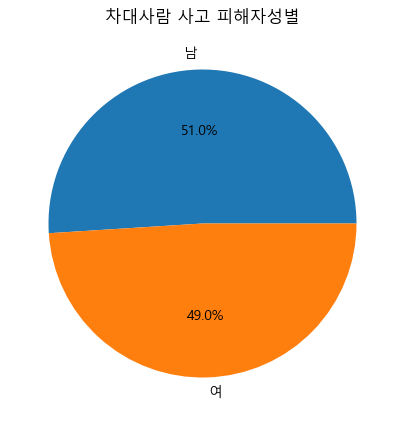

In [9]:
# 차대사람 교통사고에서 피해자의 성비
Seoul_0719.groupby(Seoul_0719[Seoul_0719['사고유형_대분류'] != '차대차']['피해자성별']).size().plot(kind='pie',
                                            title='차대사람 사고 피해자성별', autopct='%.1f%%')

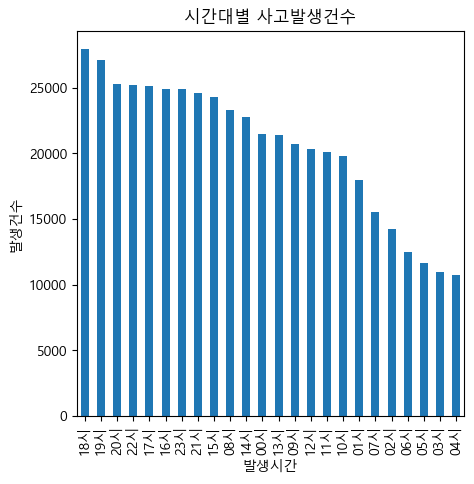

In [10]:
# 시간대별 사고발생건수
Seoul_0719.groupby(Seoul_0719['발생시간']).size().sort_values(ascending=False).plot(kind='bar', title='시간대별 사고발생건수')
plt.ylabel('발생건수')
plt.show()

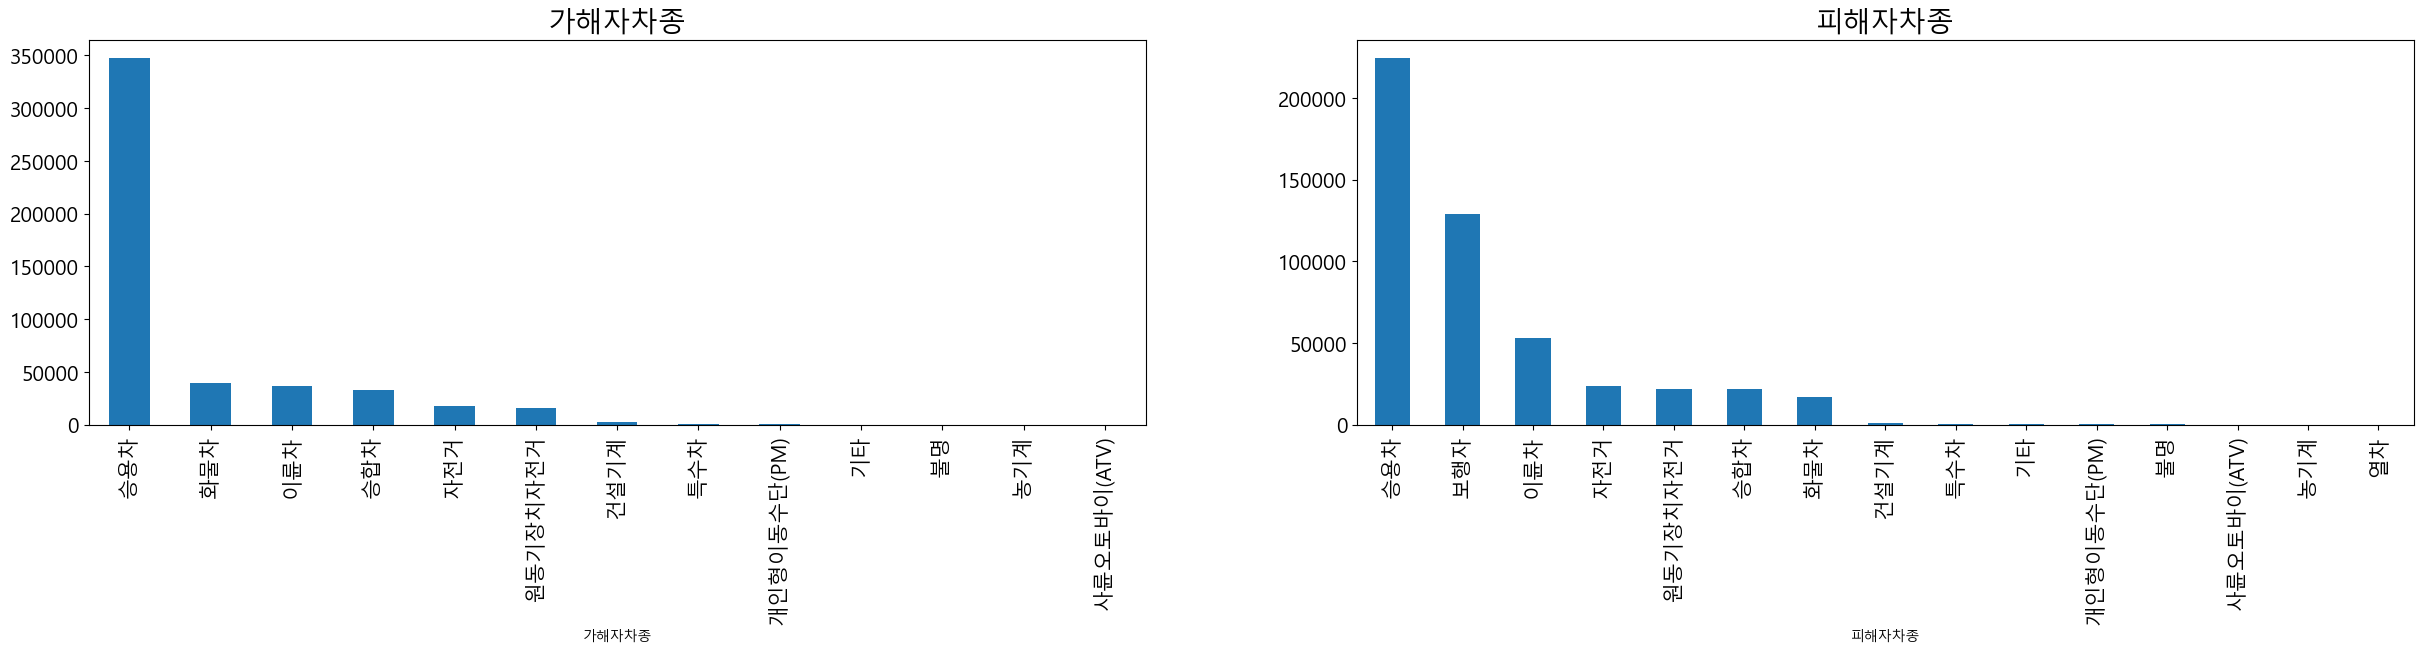

In [11]:
# 가해자, 피해자 차종별 교통사고 발생 건수

plt.figure(figsize=(30, 5))
plt.subplot(1, 2, 1)
Seoul_0719.groupby(Seoul_0719['가해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('가해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 2, 2)
Seoul_0719.groupby(Seoul_0719['피해자차종']).size().sort_values(ascending=False).plot(kind='bar')
plt.title('피해자차종', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

<Axes: title={'center': '가해자법규위반'}, xlabel='가해자법규위반'>

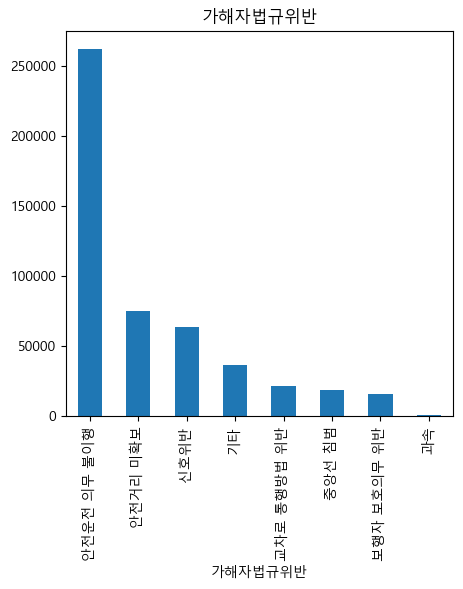

In [12]:
# 가해자법규위반별 교통사고 발생 건수
Seoul_0719.groupby(Seoul_0719['가해자법규위반']).size().sort_values(ascending=False).plot(kind='bar', title='가해자법규위반')

### 1-1) 항목별 사망사고 발생 비율 비교

In [ ]:
from scipy import stats

def p_value(item):
    ct = pd.crosstab(Seoul_0719[item], Seoul_0719['사망여부'])
    p_value = str(stats.chi2_contingency(ct)[1])
    
    return p_value

def make_df(item):
    li_1 = np.array(Seoul_0719.groupby(item).sum()['사망여부'])
    li_2 = np.array(Seoul_0719.groupby(item).size())
    li_3 = li_2 - li_1

    li_result = np.round((li_1 / li_2) * 100, 4)
    
    df_idx = Seoul_0719.groupby(item).size().index
    col_dict = {'사망자 발생 건수':li_1, '사망자 미발생 건수':li_3, '사고발생 건수':li_2, '사망사고 비율(%)':li_result}
    df_temp = pd.DataFrame(col_dict, index=df_idx).sort_values(by='사망사고 비율(%)', ascending=False)

    return df_temp

def main():
    print("-------------------------- 선택 항목 --------------------------")
    print("1. 주야              2. 노면상태             3. 기상상태")
    print("4. 도로형태          5. 발생시간             6. 가해자법규위반")
    print("7. 가해자차종        8. 피해자차종           9. 피해자연령대")
    print("10.사고유형_대분류   11.사고유형")
    print("---------------------------------------------------------------")

    selection = int(input('원하는 항목 선택: '))
    sel_item_dict = {1:'주야', 2:'노면상태', 3:'기상상태', 4:'도로형태',
                     5:'발생시간', 6:'가해자법규위반', 7:'가해자차종',
                     8:'피해자차종', 9:'피해자연령대', 10:'사고유형_대분류',
                     11:'사고유형'}
    
    df = make_df(sel_item_dict[selection])
    
    display(df)
    
    print('p-value: ' + p_value(sel_item_dict[selection]))
    
if __name__ == '__main__':
     main()

## 2) 지도 시각화

#### folium 모듈 설치 (관리자 권한으로 최초 1회)

In [13]:
# folium 설치
!pip install folium

In [14]:
import pandas as pd
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Data Load
Seoul_pop = pd.read_csv('..\data\output\연도별 서울 자치구 인구수와 사건발생 건수.csv', encoding='cp949')

geo_path = '..\lib\skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

#### 2-1) 시각화 이미지 확인(연도/항목 선택형)

In [15]:
def draw_map(df, item):
    geo = folium.Map(location=[37.5502, 126.982], zoom_start=11) #tiles='Stamen Toner'

    geo.choropleth(geo_data=geo_str,
                   data=df[item],
                   columns=(df.index, df[item]),
                   #columns=(Seoul_pop[Seoul_pop['연도'] == 2007]['자치구'], Seoul_pop[Seoul_pop['연도'] == 2007]['발생건수']),
                   fill_color='PuRd', #PuRd, YlGnBu
                   key_on='feature.id')
    display(geo)

    
def main():
    print("------------- 선택 항목 -------------")
    print("1. 자치구별 교통사고 발생건수")
    print("2. 자치구별 인구 수 대비 사고발생 비율")
    sel_item = int(input("확인하고자하는 항목의 번호를 입력하시오: "))
    sel_year = int(input("2007 ~ 2019년 사이에서 확인할 연도를 입력하시오: "))
    
    sel_item_dict = {1:'발생건수', 2:'인구 수 대비 사고비율'}
    
    tmp_df = Seoul_pop[Seoul_pop['연도'] == sel_year][['자치구', sel_item_dict[sel_item]]].set_index('자치구')
    
    draw_map(tmp_df, sel_item_dict[sel_item])
    
if __name__ == '__main__':
     main()

------------- 선택 항목 -------------
1. 자치구별 교통사고 발생건수
2. 자치구별 인구 수 대비 사고발생 비율


확인하고자하는 항목의 번호를 입력하시오:  1
2007 ~ 2019년 사이에서 확인할 연도를 입력하시오:  2019


#### 2-2) 시각화 이미지 확인(2007년부터 2019년 시간 순으로 이미지 변경)

In [16]:
from IPython.display import display, clear_output
import time

def draw_map(df, year, item):
    geo = folium.Map(location=[37.5502, 126.982], zoom_start=11) #tiles='Stamen Toner'

    geo.choropleth(geo_data=geo_str,
                   data=df[item],
                   columns=(df.index, df[item]),
                   fill_color='PuRd', #PuRd, YlGnBu
                   legend_name='%d년'%year,
                   key_on='feature.id')
    display(geo)
    
def main():
    print("------------- 선택 항목 -------------")
    print("1. 자치구별 교통사고 발생건수")
    print("2. 자치구별 인구 수 대비 사고발생 비율")
    sel_item = int(input("확인하고자하는 항목의 번호를 입력하시오: "))
    
    sel_item_dict = {1:'발생건수', 2:'인구 수 대비 사고비율'}
    
    # 2007년부터 1초 간격으로 2019년까지 지도에 시각화한 이미지를 보여줌
    for i in range(13):
        clear_output(wait=True)
        year = 2007 + i
        tmp_df = Seoul_pop[Seoul_pop['연도'] == year][['자치구', sel_item_dict[sel_item]]].set_index('자치구')
        draw_map(tmp_df, year, sel_item_dict[sel_item])
        time.sleep(1)
    
if __name__ == '__main__':
     main()

<Axes: title={'center': '2019년 서울 자치구별 인구수'}, xlabel='자치구'>

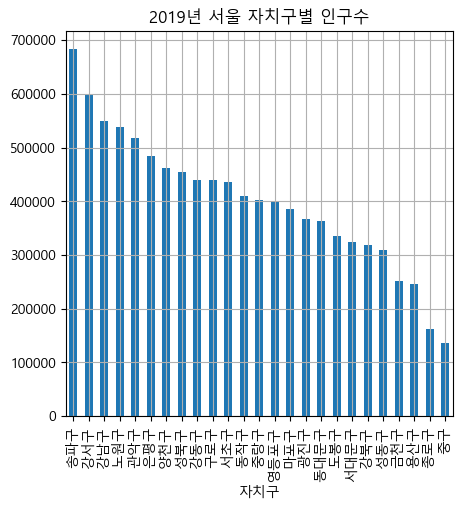

In [17]:
Seoul_pop[Seoul_pop['연도'] == 2019].set_index('자치구')['인구'].sort_values(ascending=False).plot(kind='bar', grid=True, title='2019년 서울 자치구별 인구수')